# Assignment 1


In [57]:
import random
import time
import matplotlib.pyplot as plt  


In [58]:
# Generate a random array
def generate_random_array(size, min_val=1, max_val=None):
    if max_val is None:
        max_val = size * 100
    return [random.randint(min_val, max_val) for _ in range(size)]


In [59]:
# Insertion Sort
def insertion_sort(arr):  
    n = len(arr)
    for i in range(1, n):   #4 1 2 7
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [60]:
# Selection Sort 
def selection_sort(arr): # 7 4 8 1
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]: 
                min_index = j
        if min_index != i:  
            arr[i], arr[min_index] = arr[min_index], arr[i] #1 swap per iteration 


In [61]:
# Bubble Sort
def bubble_sort(arr): #3 6 1 2 #1234
    n = len(arr) 
    for i in range(n, 0, -1):  
        swapped = False
        for j in range(i - 1):  #j=0 ; j<i-1
            if arr[j] > arr[j + 1]:  
                arr[j], arr[j + 1] = arr[j + 1], arr[j]  
                swapped = True  
        if not swapped: 
            break 

In [62]:
# to measure sorting time
def measure_time(sort_function, arr):
    arr_copy = arr.copy()  # More efficient copying
    start_time = time.time()
    sort_function(arr_copy)
    end_time = time.time()
    return (end_time - start_time) * 1000 

def test_sorting_and_plot():
    array_sizes = [1000, 2500, 5000, 10000, 25000, 50000]  
    insertion_times = []
    selection_times = []
    bubble_times = []

    for size in array_sizes: #size 1000 ]
        arr = generate_random_array(size)  

        insertion_times.append(measure_time(insertion_sort, arr))
        selection_times.append(measure_time(selection_sort, arr))
        bubble_times.append(measure_time(bubble_sort, arr))

        print(f"\nArray Size: {size}")
        print(f"Insertion Sort Time: {insertion_times[-1]:.2f} ms")
        print(f"Selection Sort Time: {selection_times[-1]:.2f} ms")
        print(f"Bubble Sort Time: {bubble_times[-1]:.2f} ms")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(array_sizes, insertion_times, marker='o', linestyle='-', color='r', label="Insertion Sort")
    plt.plot(array_sizes, selection_times, marker='s', linestyle='-', color='g', label="Selection Sort")
    plt.plot(array_sizes, bubble_times, marker='^', linestyle='-', color='b', label="Bubble Sort")
    
    plt.xlabel("Array Size")
    plt.ylabel("Time (ms)")
    plt.title("Sorting Algorithms: Time Complexity Analysis")
    plt.legend()
    plt.grid(True)
    plt.show()

test_sorting_and_plot()


Array Size: 1000
Insertion Sort Time: 36.76 ms
Selection Sort Time: 35.37 ms
Bubble Sort Time: 91.58 ms

Array Size: 2500
Insertion Sort Time: 200.50 ms
Selection Sort Time: 245.72 ms
Bubble Sort Time: 452.68 ms

Array Size: 5000
Insertion Sort Time: 838.70 ms
Selection Sort Time: 778.65 ms
Bubble Sort Time: 2167.80 ms


KeyboardInterrupt: 

# Assignment 2


## Quick Sort

In [27]:
def partition(arr, low, high):

    # Choose a random pivot and swap it with the last element
    #to avoid worst case scenario
    pivot_index = random.randint(low, high)
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    pivot = arr[high]  # Pivot is now the last element
    
    i = low  # Start i from low
    
    for j in range(low, high):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]  # Swap smaller element with arr[i]
            i += 1  # Move i to next position for smaller elements

    # Swap pivot with arr[i], now pivot is in the right place
    arr[i], arr[high] = arr[high], arr[i]
    
    return i  # Pivot index

In [28]:
def quick_sort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)  #  Get the pivot index
        quick_sort(arr, low, pivot_index - 1)  # sort left part
        quick_sort(arr, pivot_index + 1, high)  # sort right part

## Quick Sort image

![Quick Sort Image](https://imgs.search.brave.com/M3MhTxiMV69WJcGBXI3q2jqFj_YKdytAby40HPkWfTg/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9zMy5h/bWF6b25hd3MuY29t/L2hyLWNoYWxsZW5n/ZS1pbWFnZXMvcXVp/Y2stc29ydC9RdWlj/a1NvcnRJblBsYWNl/LnBuZw)


## Merge Sort

In [64]:
def merge_sort(arr):
    def sort(left, right):
        if left >= right:
            return  # Base case: one or zero elements are sorted
        
        mid = (left + right) // 2
        
        # Recursively sort the two halves
        sort(left, mid)
        sort(mid + 1, right)
        
        # Merge the sorted halves
        merge(arr, left, mid, right)
    
    sort(0, len(arr) - 1)


In [63]:
def merge(arr, left, mid, right):
    """Merge two sorted halves in place."""
    left_part = arr[left:mid + 1]
    right_part = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < len(left_part) and j < len(right_part):
        if left_part[i] <= right_part[j]:
            arr[k] = left_part[i]
            i += 1
        else:
            arr[k] = right_part[j]
            j += 1
        k += 1

    while i < len(left_part):
        arr[k] = left_part[i]
        i += 1
        k += 1

    while j < len(right_part):
        arr[k] = right_part[j]
        j += 1
        k += 1


In [20]:
def heapify(arr, n, i):
       
    largest = i  # Assume root is the largest
    left = 2 * i + 1  # Left child index
    right = 2 * i + 2  # Right child index

    # Check if left child exists and is greater than root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Check if right child exists and is greater than current largest
    if right < n and arr[right] > arr[largest]:
        largest = right

    # If largest is not root, swap and continue heapifying
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        heapify(arr, n, largest)  # Recursively heapify the affected subtree


In [21]:
def build_max_heap(arr):
    
    # This function converts an unsorted array into a max-heap.
    #  starts from the last non-leaf node and moves up.
    
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):  # Start from the last non-leaf node
        heapify(arr, n, i)

In [22]:
def heap_sort(arr):
    
    # extracts the max element and re-heapifies the array.
    
    n = len(arr)

    # Step 1: Build a max-heap
    build_max_heap(arr)

    # Step 2: Extract elements from the heap one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap max element to end
        heapify(arr, i, 0)  # Restore heap property on the reduced heap

In [65]:
arr1 = [0,10, 7, 8, 9,-100,1000 ,1, 5]
quick_sort(arr1, 0, len(arr1) - 1)
print("quick sort result: Sorted array:", arr1)
print("...........................")

arr2 = [0,10, 7, 8, 9,-100,1000 ,1, 5]
merge_sort(arr2)
print("Merge sort result: Sorted array:", arr2)
arr3 = [0,10, 7, 8, 9,-100,1000 ,1, 5]
print("..................................")
heap_sort(arr3)
print("Heap sort result: Sorted array:", arr3)

quick sort result: Sorted array: [-100, 0, 1, 5, 7, 8, 9, 10, 1000]
...........................
Merge sort result: Sorted array: [-100, 0, 1, 5, 7, 8, 9, 10, 1000]
..................................
Heap sort result: Sorted array: [-100, 0, 1, 5, 7, 8, 9, 10, 1000]


# Hybrid merge and insertion sort algorithm

In [66]:
# Hybrid Merge Sort (Using Merge Sort + Insertion Sort)
def hybrid_merge_sort(arr, threshold):
    """Hybrid Merge Sort function (handles left & right internally)."""
    def sort(left, right):
        if right - left + 1 <= threshold:
            insertion_sort(arr)  # Use insertion sort for small subarrays
            return

        if left < right:
            mid = (left + right) // 2
            sort(left, mid)       #  recursive call for left half
            sort(mid + 1, right)  #  recursive call for right half
            merge(arr, left,right,mid)  #  merge function call

    # Start the sorting process with full array bounds
    sort(0, len(arr) - 1)


test_cases = [
    [38, 27, 43, 3, 9, 82, 10],   # Unsorted list
    [1, 2, 3, 4, 5, 6, 7],         # Already sorted list
    [7, 6, 5, 4, 3, 2, 1],         # Reverse sorted list
    [10, -2, 33, 4, 0, 5, 2],      # List with negative numbers
    [5],                           # Single element list
    [],                            # Empty list
    [3, 3, 3, 3, 3, 3],            # All elements are the same
]

threshold = 3  # Set threshold for switching to insertion sort

for i, arr in enumerate(test_cases):
    print(f"Array {i+1}:  {arr}")
    hybrid_merge_sort(arr, threshold)
    print(f"Sorted Array: {arr}\n")



Array 1:  [38, 27, 43, 3, 9, 82, 10]
Sorted Array: [3, 9, 10, 27, 38, 43, 82]

Array 2:  [1, 2, 3, 4, 5, 6, 7]
Sorted Array: [1, 2, 3, 4, 5, 6, 7]

Array 3:  [7, 6, 5, 4, 3, 2, 1]
Sorted Array: [1, 2, 3, 4, 5, 6, 7]

Array 4:  [10, -2, 33, 4, 0, 5, 2]
Sorted Array: [-2, 0, 2, 4, 5, 10, 33]

Array 5:  [5]
Sorted Array: [5]

Array 6:  []
Sorted Array: []

Array 7:  [3, 3, 3, 3, 3, 3]
Sorted Array: [3, 3, 3, 3, 3, 3]



#  Find Kth smallest Element in Unsorted Array

In [29]:
def quick_select(arr, low, high, k):
    if low <= high: #base case
        
        pivot_index = partition(arr, low, high)

        if pivot_index == k - 1:   #pivot is the smallest element as arr zero indexed
            return arr[pivot_index]
        elif pivot_index > k - 1:
            return quick_select(arr, low, pivot_index - 1, k)
        else:
            return quick_select(arr, pivot_index + 1, high, k)

    return None

In [32]:
arr = [3, 41, 16, 25, 63, 52, 40]
k = 3  
result = quick_select(arr, 0, len(arr) - 1, k)
print(f"{k}rd smallest element is : {result}")

arr = [3, 41, 16, 25, 63, 52, 40]
k = 5  
result = quick_select(arr, 0, len(arr) - 1, k)
print(f"{k}th smallest element is : {result}")

3rd smallest element is : 25
5th smallest element is : 41


# Graph


Array Size: 1000
Quick Sort Time: 3.11 ms
Merge Sort Time: 3.69 ms
Heap Sort Time: 2.58 ms

Array Size: 2500
Quick Sort Time: 11.90 ms
Merge Sort Time: 11.36 ms
Heap Sort Time: 18.23 ms

Array Size: 5000
Quick Sort Time: 16.87 ms
Merge Sort Time: 22.86 ms
Heap Sort Time: 20.21 ms

Array Size: 10000
Quick Sort Time: 26.74 ms
Merge Sort Time: 35.74 ms
Heap Sort Time: 39.35 ms

Array Size: 25000
Quick Sort Time: 78.77 ms
Merge Sort Time: 123.12 ms
Heap Sort Time: 133.34 ms

Array Size: 50000
Quick Sort Time: 152.63 ms
Merge Sort Time: 228.12 ms
Heap Sort Time: 334.08 ms

Array Size: 75000
Quick Sort Time: 325.50 ms
Merge Sort Time: 397.82 ms
Heap Sort Time: 524.86 ms

Array Size: 100000
Quick Sort Time: 337.45 ms
Merge Sort Time: 464.32 ms
Heap Sort Time: 787.53 ms

Array Size: 125000
Quick Sort Time: 514.16 ms
Merge Sort Time: 632.70 ms
Heap Sort Time: 858.21 ms

Array Size: 150000
Quick Sort Time: 595.24 ms
Merge Sort Time: 881.99 ms
Heap Sort Time: 1142.80 ms

Array Size: 175000
Quick

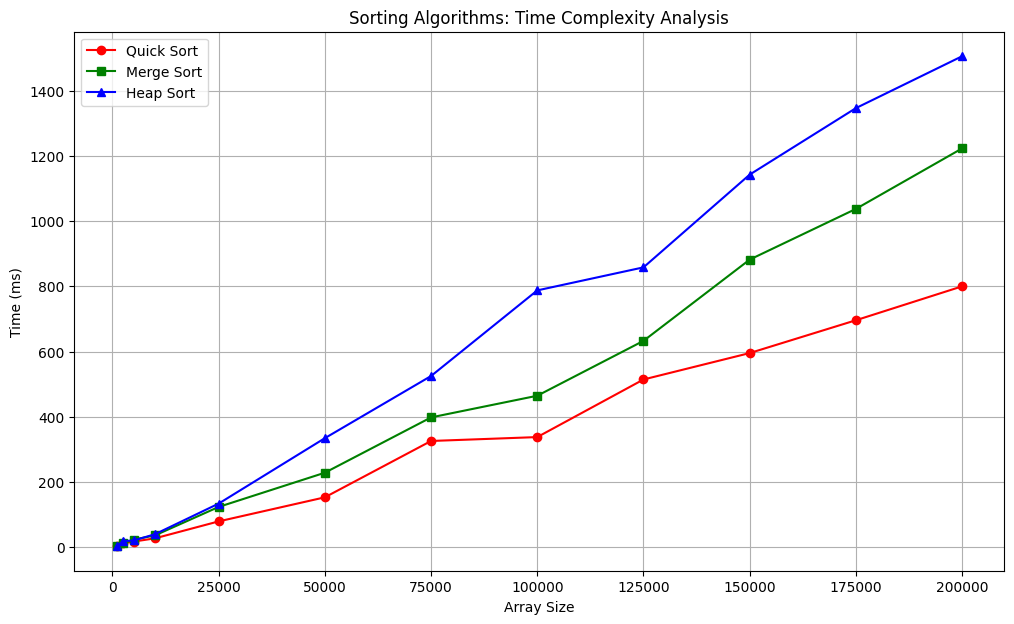

In [72]:
def measure_time(sort_function, arr, *args):
    arr_copy = arr.copy()
    start_time = time.time()

    sort_function(arr_copy, *args)

    end_time = time.time()
    return (end_time - start_time) * 1000  

# Function to test and plot
def test_sorting_and_plot():
    array_sizes = [1000, 2500, 5000, 10000, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
    quick_times = []
    merge_times = []
    heap_times = []

    for size in array_sizes:
        arr = generate_random_array(size)

        # Time Quick Sort
        quick_time = measure_time(quick_sort, arr, 0, len(arr) - 1)
        quick_times.append(quick_time)

        # Time Merge Sort
        merge_time = measure_time(merge_sort, arr)
        merge_times.append(merge_time)

        # Time Heap Sort
        heap_time = measure_time(heap_sort, arr)
        heap_times.append(heap_time)

        print(f"\nArray Size: {size}")
        print(f"Quick Sort Time: {quick_time:.2f} ms")
        print(f"Merge Sort Time: {merge_time:.2f} ms")
        print(f"Heap Sort Time: {heap_time:.2f} ms")

    # Plot results
    plt.figure(figsize=(12, 7))
    plt.plot(array_sizes, quick_times, marker='o', linestyle='-', color='r', label="Quick Sort")
    plt.plot(array_sizes, merge_times, marker='s', linestyle='-', color='g', label="Merge Sort")
    plt.plot(array_sizes, heap_times, marker='^', linestyle='-', color='b', label="Heap Sort")

    plt.xlabel("Array Size")
    plt.ylabel("Time (ms)")
    plt.title("Sorting Algorithms: Time Complexity Analysis")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the test
test_sorting_and_plot()

# Final Graph 


Array Size: 1000
Quick Sort Time: 4.69 ms
Merge Sort Time: 5.89 ms
Heap Sort Time: 3.82 ms
Insertion Sort Time: 31.28 ms
Bubble Sort Time: 56.77 ms
Selection Sort Time: 26.60 ms

Array Size: 2500
Quick Sort Time: 4.42 ms
Merge Sort Time: 7.03 ms
Heap Sort Time: 7.52 ms
Insertion Sort Time: 184.54 ms
Bubble Sort Time: 417.85 ms
Selection Sort Time: 182.68 ms

Array Size: 5000
Quick Sort Time: 11.80 ms
Merge Sort Time: 14.17 ms
Heap Sort Time: 21.33 ms
Insertion Sort Time: 861.22 ms
Bubble Sort Time: 1963.49 ms
Selection Sort Time: 1026.52 ms

Array Size: 10000
Quick Sort Time: 29.26 ms
Merge Sort Time: 42.88 ms
Heap Sort Time: 51.06 ms
Insertion Sort Time: 5377.47 ms
Bubble Sort Time: 7741.30 ms
Selection Sort Time: 3549.83 ms

Array Size: 25000
Quick Sort Time: 88.55 ms
Merge Sort Time: 102.55 ms
Heap Sort Time: 171.43 ms
Insertion Sort Time: 25410.41 ms
Bubble Sort Time: 57691.36 ms
Selection Sort Time: 27905.93 ms

Array Size: 50000
Quick Sort Time: 178.24 ms
Merge Sort Time: 223.18

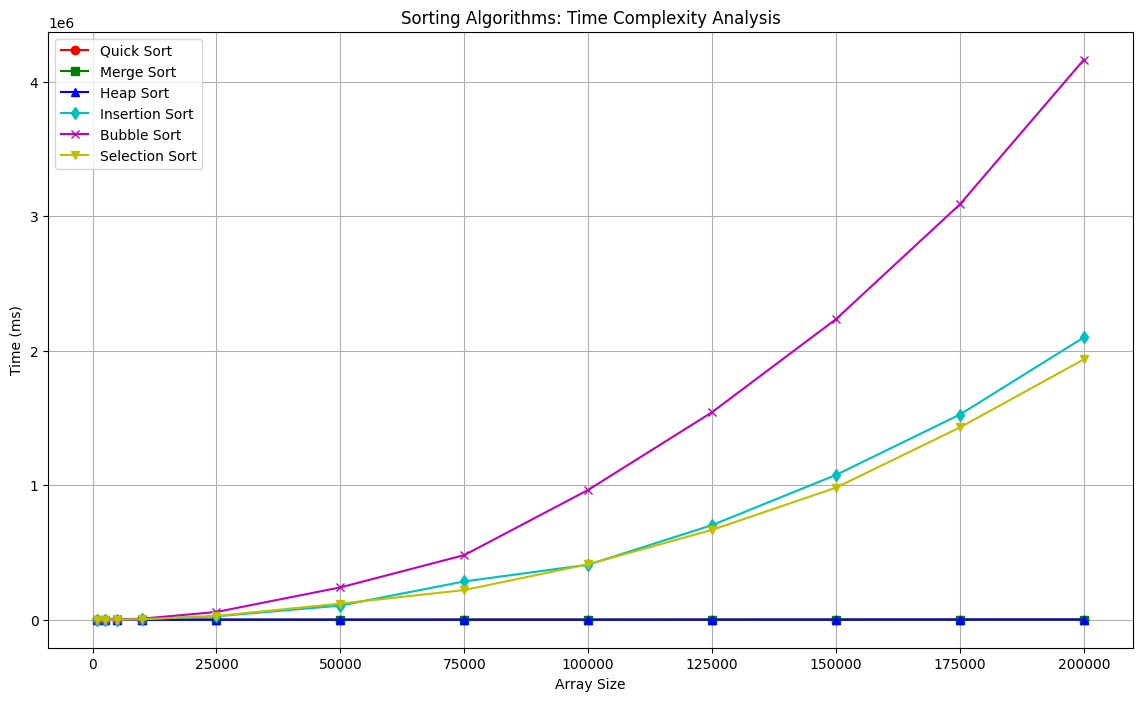

In [39]:
def measure_time(sort_function, arr, *args):
    arr_copy = arr.copy()
    start_time = time.time()

    sort_function(arr_copy, *args)

    end_time = time.time()
    return (end_time - start_time) * 1000  

# Function to test and plot
def test_sorting_and_plot():
    array_sizes = [1000, 2500, 5000, 10000, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
    quick_times = []
    merge_times = []
    heap_times = []
    insertion_times = []
    bubble_times = []
    selection_times = []

    for size in array_sizes:
        arr = generate_random_array(size)

        
        quick_time = measure_time(quick_sort, arr, 0, len(arr) - 1)
        quick_times.append(quick_time)

        
        merge_time = measure_time(merge_sort, arr)
        merge_times.append(merge_time)

        
        heap_time = measure_time(heap_sort, arr)
        heap_times.append(heap_time)

        
        insertion_time = measure_time(insertion_sort, arr)
        insertion_times.append(insertion_time)

        
        bubble_time = measure_time(bubble_sort, arr)
        bubble_times.append(bubble_time)

        
        selection_time = measure_time(selection_sort, arr)
        selection_times.append(selection_time)

        print(f"\nArray Size: {size}")
        print(f"Quick Sort Time: {quick_time:.2f} ms")
        print(f"Merge Sort Time: {merge_time:.2f} ms")
        print(f"Heap Sort Time: {heap_time:.2f} ms")
        print(f"Insertion Sort Time: {insertion_time:.2f} ms")
        print(f"Bubble Sort Time: {bubble_time:.2f} ms")
        print(f"Selection Sort Time: {selection_time:.2f} ms")

    plt.figure(figsize=(14, 8))

    plt.plot(array_sizes, quick_times, marker='o', linestyle='-', color='r', label="Quick Sort")
    plt.plot(array_sizes, merge_times, marker='s', linestyle='-', color='g', label="Merge Sort")
    plt.plot(array_sizes, heap_times, marker='^', linestyle='-', color='b', label="Heap Sort")
    plt.plot(array_sizes, insertion_times, marker='d', linestyle='-', color='c', label="Insertion Sort")
    plt.plot(array_sizes, bubble_times, marker='x', linestyle='-', color='m', label="Bubble Sort")
    plt.plot(array_sizes, selection_times, marker='v', linestyle='-', color='y', label="Selection Sort")

    plt.xlabel("Array Size")
    plt.ylabel("Time (ms)")
    plt.title("Sorting Algorithms: Time Complexity Analysis")
    plt.legend()
    plt.grid(True)
    plt.show()

test_sorting_and_plot()